**Задача**

Требуется реализовать метод ближайших соседей (KNN) для двух классов с параметризуемым числом соседей

In [17]:
from scipy import stats
import numpy as np
from numpy import linalg 
from typing import SupportsIndex
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn.metrics import classification_report, accuracy_score

In [19]:
class KNN(object):
    
    def __init__(self, n_neighbours: int = 4) -> None:
        
        # обучающая выборка: признаки
        self.X_train = None

        # обучающая выборка: метки классов
        self.y_train = None

        # число ближайших соседей
        self.n_neighbours = n_neighbours

    def fit(self, X: np.ndarray, y: SupportsIndex) -> 'KNN':
        
        self.X_train = X.copy()
        self.y_train = y.copy()
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # 1) Вычислим евклидово расстояние между всеми парами точек вида:
        #     одна из X, другая из self.X_train. Для удобства запишем расстояния в матрицу.

        # 2) Для каждой точки из X найдём self.n_neighbours ближайших из self.X_train.
        #     В этом поможет метод np.argsort.
        #     Выберем среди них самую частотную соседскую метку (из self.y_train).
        #     А именно -- если количество меток "1" среди голосов >= 50%, назначаем её.

        # Вычисляем расстояния между всеми парами точек из X и self.X_train
        distances = [[linalg.norm(X[i]-self.X_train[j]) for j in range(self.X_train.shape[0])] for i in range(X.shape[0])]
        
        # Находим self.n_neighbours ближайших к каждой точке
        nearests = np.argsort(distances,axis=1)[:,:self.n_neighbours]
        
        # Определяем классы ближайших точек
        classes = np.array([[self.y_train[nearests[i][j]] for j in range(self.n_neighbours)] for i in range(nearests.shape[0])])
        
        # Находим самый частотный класс
        pred = stats.mode(classes.T)[0]
        return pred


def accuracy(labels_true: np.ndarray, labels_predicted: np.ndarray) -> float:
    
    total_matches = np.sum(labels_true==labels_predicted)
    size = len(labels_true)
    return total_matches / size

In [20]:
# фиксируем random seed для воспроизводимости результата
np.random.seed(104)

# создаём синтетический набор данных для обучения и тестирования
means0 = [-30, -1]
covs0 = [[1710, 100.8],
         [100.8, 30.1]]
x0, y0 = np.random.multivariate_normal(means0, covs0, 190).T

means1 = [0, -1]
covs1 = [[1510, 0.0],
         [0.0, 1200]]
x1, y1 = np.random.multivariate_normal(means1, covs1, 100).T

data0 = np.vstack([x0, y0]).T
labels0 = np.zeros(data0.shape[0])

data1 = np.vstack([x1, y1]).T
labels1 = np.ones(data1.shape[0])

data = np.vstack([data0, data1])
labels = np.hstack([labels0, labels1])
total_size = data.shape[0]
print("Original dataset shapes:", data.shape, labels.shape)

# берём случайные 70% как train
train_size = int(total_size * 0.7)
indices = np.random.permutation(total_size)

X_train, y_train = data[indices][:train_size], labels[indices][:train_size]
X_test, y_test = data[indices][train_size:], labels[indices][train_size:]
print("Train/test sets shapes:", X_train.shape, X_test.shape)

for i in range(1,6):
    # создаём объект-классификатор
    predictor = KNN(n_neighbours=i)
    
    predictor.fit(X_train, y_train)
    y_pred = predictor.predict(X_test)
    
    print("Accuracy: %.4f [ours]" % accuracy(y_test, y_pred))

    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    anoth_y_pred = neigh.predict(X_test)
    
    # сверим значение с оценкой из библиотеки sklearn
    print("Accuracy: %.4f [sklearn]" % accuracy_score(y_test, anoth_y_pred))
    print()

Original dataset shapes: (290, 2) (290,)
Train/test sets shapes: (203, 2) (87, 2)
Accuracy: 0.8851 [ours]
Accuracy: 0.8851 [sklearn]

Accuracy: 0.8736 [ours]
Accuracy: 0.8736 [sklearn]

Accuracy: 0.8851 [ours]
Accuracy: 0.8851 [sklearn]

Accuracy: 0.8851 [ours]
Accuracy: 0.8851 [sklearn]

Accuracy: 0.8851 [ours]
Accuracy: 0.8851 [sklearn]



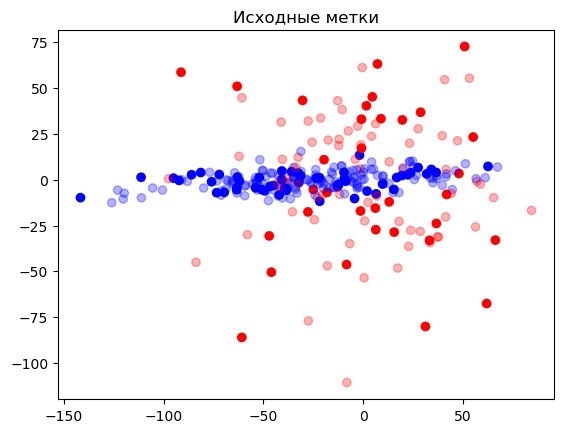

In [21]:
# Полупрозрачные точки - точки из обучающей выборки
plt.scatter(X_test.T[0], X_test.T[1], c=y_test,cmap = mcolors.ListedColormap(["b", "r"]))
plt.scatter(X_train.T[0], X_train.T[1], c=y_train,alpha=0.3,cmap = mcolors.ListedColormap(["b", "r"]))
plt.title('Исходные метки') 
plt.show()

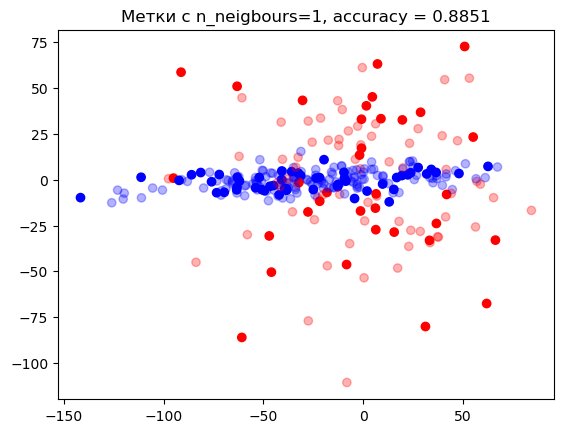

In [22]:
predictor = KNN(n_neighbours=1)
predictor.fit(X_train,y_train)
y_pred = predictor.predict(X_test)

# Полупрозрачные точки - точки из обучающей выборки
plt.scatter(X_test.T[0], X_test.T[1], c=y_pred,cmap = mcolors.ListedColormap(["b", "r"]))
plt.scatter(X_train.T[0], X_train.T[1], c=y_train,alpha=0.3,cmap = mcolors.ListedColormap(["b", "r"]))
plt.title(f'Метки с n_neigbours=1, accuracy = {round(accuracy(y_test,y_pred),4)}')
plt.savefig("Метки с n_neigbours=1.png") 
plt.show()

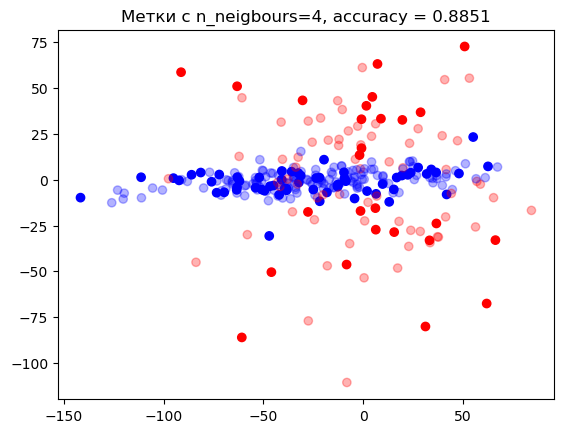

In [23]:
predictor = KNN(n_neighbours=4)
predictor.fit(X_train,y_train)
y_pred = predictor.predict(X_test)

# Полупрозрачные точки - точки из обучающей выборки
plt.scatter(X_test.T[0], X_test.T[1], c=y_pred,cmap = mcolors.ListedColormap(["b", "r"]))
plt.scatter(X_train.T[0], X_train.T[1], c=y_train,alpha=0.3,cmap = mcolors.ListedColormap(["b", "r"]))
plt.title(f'Метки с n_neigbours=4, accuracy = {round(accuracy(y_test,y_pred),4)}')
plt.show()